<a href="https://colab.research.google.com/github/pingkivila/DigitalSkola_DataScience11/blob/main/Intermediate_Dataframe.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#**Intermediate Dataframe**

created by Pingki Vila Tri Wahyuni


This notebook is created to teach student about dataframe intermediate level. All the code is free to reuse by everyone.

**Contents**
1. Sorting in Dataframe
2. Filtering Dataframe
3. Creating Additional Column
4. Grouping & Aggregating Dataframe
5. Merging Dataframe
6. Homework
___

In [ ]:
#import library
import pandas as pd
import numpy as np

In [ ]:
data = pd.read_csv("https://raw.githubusercontent.com/densaiko/data_science_learning/main/dataset/insurance.csv")
data.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


### Sorting in Dataframe

In [ ]:
## Alphabetic sorting default (ascending)
data.sort_values(by=['sex'])

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
714,24,female,22.600,0,no,southwest,2457.50200
716,49,female,22.610,1,no,northwest,9566.99090
718,51,female,36.670,2,no,northwest,10848.13430
719,58,female,33.440,0,no,northwest,12231.61360
...,...,...,...,...,...,...,...
786,60,male,36.955,0,no,northeast,12741.16745
787,21,male,36.860,0,no,northwest,1917.31840
788,29,male,22.515,3,no,northeast,5209.57885
821,26,male,17.670,0,no,northwest,2680.94930


In [ ]:
## Alphabetic sorting descending
data.sort_values(by=['sex'], ascending=False)

,age,sex,bmi,children,smoker,region,charges
446,60,male,29.64,0,no,northeast,12730.9996
1052,49,male,29.83,1,no,northeast,9288.0267
1070,37,male,37.07,1,yes,southeast,39871.7043
550,63,male,30.80,0,no,southwest,13390.5590
1068,63,male,21.66,1,no,northwest,14349.8544
...,...,...,...,...,...,...,...
602,56,female,25.30,0,no,southwest,11070.5350
603,64,female,39.05,3,no,southeast,16085.1275
604,19,female,28.31,0,yes,northwest,17468.9839
605,51,female,34.10,0,no,southeast,9283.5620


In [ ]:
## Numerical sorting ascending
data.sort_values(by=['age']).head()

,age,sex,bmi,children,smoker,region,charges
1248,18,female,39.82,0,no,southeast,1633.96180
482,18,female,31.35,0,no,southeast,1622.18850
492,18,female,25.08,0,no,northeast,2196.47320
525,18,female,33.88,0,no,southeast,11482.63485
529,18,male,25.46,0,no,northeast,1708.00140


In [ ]:
## Sorting more than two columns 
data.sort_values(by=['age','bmi'])

,age,sex,bmi,children,smoker,region,charges
172,18,male,15.960,0,no,northeast,1694.79640
250,18,male,17.290,2,yes,northeast,12829.45510
359,18,female,20.790,0,no,southeast,1607.51010
1212,18,male,21.470,0,no,northeast,1702.45530
1033,18,male,21.565,0,yes,northeast,13747.87235
...,...,...,...,...,...,...,...
603,64,female,39.050,3,no,southeast,16085.12750
418,64,male,39.160,1,no,southeast,14418.28040
199,64,female,39.330,0,no,northeast,14901.51670
768,64,female,39.700,0,no,southwest,14319.03100


### Filtering in Dataframe

In [ ]:
data[["age","sex"]]

,age,sex
0,19,female
1,18,male
2,28,male
3,33,male
4,32,male
...,...,...
1333,50,male
1334,18,female
1335,18,female
1336,21,female


In [ ]:
data.filter(items=["age","sex"])

,age,sex
0,19,female
1,18,male
2,28,male
3,33,male
4,32,male
...,...,...
1333,50,male
1334,18,female
1335,18,female
1336,21,female


#### loc & iloc

##### loc

In [ ]:
# loc basic
data.loc[:,['age','sex']].head()

,age,sex
0,19,female
1,18,male
2,28,male
3,33,male
4,32,male


In [ ]:
# loc
data.loc[(data["sex"] == "male")]

,age,sex,bmi,children,smoker,region,charges
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520
8,37,male,29.830,2,no,northeast,6406.41070


In [ ]:
# loc more than one condition
data.loc[(data["sex"] == "male") & (data['age'] < 23)]

,age,sex,bmi,children,smoker,region,charges
1,18,male,33.770,1,no,southeast,1725.55230
15,19,male,24.600,1,no,southwest,1837.23700
22,18,male,34.100,0,no,southeast,1137.01100
30,22,male,35.600,0,yes,southwest,35585.57600
35,19,male,20.425,0,no,northwest,1625.43375


In [ ]:
# loc more than one condition and show specific variables
data.loc[(data["sex"] == "male") & (data['age'] < 23), ['region', 'charges']]

,region,charges
1,southeast,1725.55230
15,southwest,1837.23700
22,southeast,1137.01100
30,southwest,35585.57600
35,northwest,1625.43375


##### iloc

In [ ]:
# iloc default
data.iloc[:,:]

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [ ]:
# iloc with index 10 to 20
data.iloc[10:21,:]

,age,sex,bmi,children,smoker,region,charges
10,25,male,26.22,0,no,northeast,2721.3208
11,62,female,26.29,0,yes,southeast,27808.7251
12,23,male,34.40,0,no,southwest,1826.8430
13,56,female,39.82,0,no,southeast,11090.7178
14,27,male,42.13,0,yes,southeast,39611.7577


In [ ]:
# iloc with index 10 to 20 and variables region & charges
data.iloc[10:21,5:]

,region,charges
10,northeast,2721.3208
11,southeast,27808.7251
12,southwest,1826.8430
13,southeast,11090.7178
14,southeast,39611.7577


### Creating Additional Column
discount charges around 15%


In [ ]:
data['discount_charges'] = data['charges']*0.15
data.head()

,age,sex,bmi,children,smoker,region,charges,discount_charges
0,19,female,27.900,0,yes,southwest,16884.92400,2532.738600
1,18,male,33.770,1,no,southeast,1725.55230,258.832845
2,28,male,33.000,3,no,southeast,4449.46200,667.419300
3,33,male,22.705,0,no,northwest,21984.47061,3297.670591
4,32,male,28.880,0,no,northwest,3866.85520,580.028280


### Grouping & Aggregating Dataframe

In [ ]:
# grouping the sex variable
data.groupby('sex')['sex'].count()

sex
female    662
male      676
Name: sex, dtype: int64

In [ ]:
# grouping average age and median charges in sex variable
data.groupby('sex').agg(average_age = ('age', 'mean'),
                        median_charges = ('charges','median'))

,average_age,median_charges
sex,,
female,39.503021,9412.96250
male,38.917160,9369.61575


### Merging Dataframe

In [ ]:
# get the five first row
data_5 = data.head()
data_5['Name'] = ["doni", "jojo", "beki", "madrid", "milan"]
data_5.head()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


,age,sex,bmi,children,smoker,region,charges,discount_charges,Name
0,19,female,27.900,0,yes,southwest,16884.92400,2532.738600,doni
1,18,male,33.770,1,no,southeast,1725.55230,258.832845,jojo
2,28,male,33.000,3,no,southeast,4449.46200,667.419300,beki
3,33,male,22.705,0,no,northwest,21984.47061,3297.670591,madrid
4,32,male,28.880,0,no,northwest,3866.85520,580.028280,milan


In [ ]:
# create new columns
series1 = pd.Series(["House 1","House 2","House 3","House 4","House 5"])
series2 = pd.Series([10000, 12300, 11000, 14000, 12100])
series3 = pd.Series(["doni", "jojo", "beki", "madrid", "milan"])
data2 = pd.DataFrame({"Type of House":series1, "Price House":series2, "Name":series3})
data2.head()

,Type of House,Price House,Name
0,House 1,10000,doni
1,House 2,12300,jojo
2,House 3,11000,beki
3,House 4,14000,madrid
4,House 5,12100,milan


#### Combining two dataframe with different name

In [ ]:
data_5.merge(data2, left_on='Name', right_on='Name')

,age,sex,bmi,children,smoker,region,charges,discount_charges,Name,Type of House,Price House
0,19,female,27.900,0,yes,southwest,16884.92400,2532.738600,doni,House 1,10000
1,18,male,33.770,1,no,southeast,1725.55230,258.832845,jojo,House 2,12300
2,28,male,33.000,3,no,southeast,4449.46200,667.419300,beki,House 3,11000
3,33,male,22.705,0,no,northwest,21984.47061,3297.670591,madrid,House 4,14000
4,32,male,28.880,0,no,northwest,3866.85520,580.028280,milan,House 5,12100


#### Combining two dataframe with the same columns

In [ ]:
data_5.merge(data2, how='inner', on='Name')

,age,sex,bmi,children,smoker,region,charges,discount_charges,Name,Type of House,Price House
0,19,female,27.900,0,yes,southwest,16884.92400,2532.738600,doni,House 1,10000
1,18,male,33.770,1,no,southeast,1725.55230,258.832845,jojo,House 2,12300
2,28,male,33.000,3,no,southeast,4449.46200,667.419300,beki,House 3,11000
3,33,male,22.705,0,no,northwest,21984.47061,3297.670591,madrid,House 4,14000
4,32,male,28.880,0,no,northwest,3866.85520,580.028280,milan,House 5,12100


# Homework

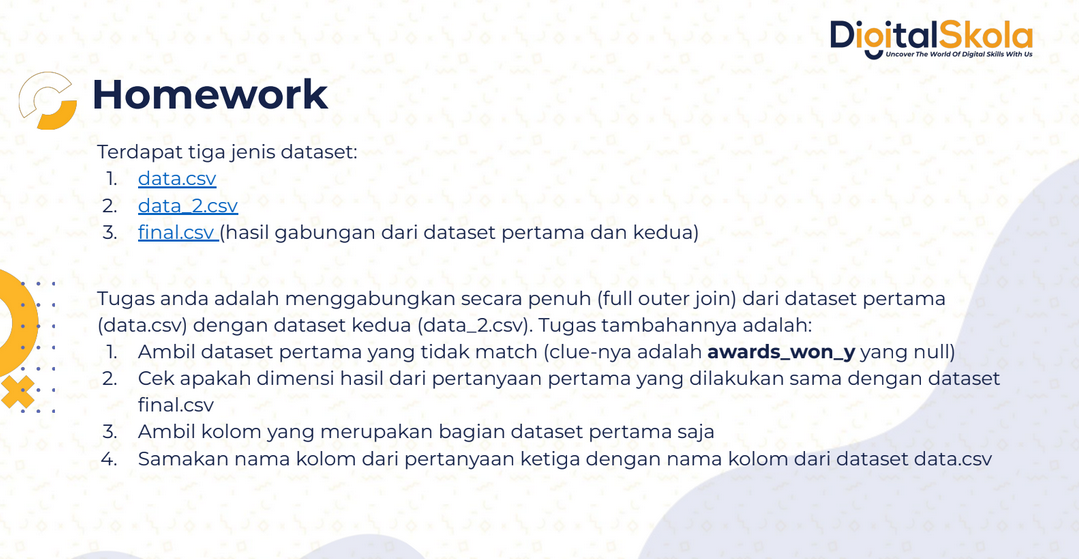

In [ ]:
import pandas as pd
import numpy as np

In [ ]:
data = pd.read_csv("https://raw.githubusercontent.com/densaiko/data_science_learning/main/dataset/Human%20Capital.csv")
data.head()

,employee_id,department,region,education,gender,recruitment_channel,no_of_trainings,age,previous_year_rating,length_of_service,awards_won,avg_training_score,is_promoted
0,65438,Sales & Marketing,region_7,Master's & above,f,sourcing,1,35,5.0,8,0,49.0,0
1,65141,Operations,region_22,Bachelor's,m,other,1,30,5.0,4,0,60.0,0
2,7513,Sales & Marketing,region_19,Bachelor's,m,sourcing,1,34,3.0,7,0,50.0,0
3,2542,Sales & Marketing,region_23,Bachelor's,m,other,2,39,1.0,10,0,50.0,0
4,48945,Technology,region_26,Bachelor's,m,other,1,45,3.0,2,0,73.0,0


In [ ]:
data_1 = data.sample(n=5000)
data = data.append(data_1)
data.shape

(59808, 13)

In [ ]:
from google.colab import files
data.to_csv("data.csv")
files.download("data.csv")

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [ ]:
data_2 = data.sample(n=5000)
print(data_2.shape)
data_2.head()

(5000, 13)


,employee_id,department,region,education,gender,recruitment_channel,no_of_trainings,age,previous_year_rating,length_of_service,awards_won,avg_training_score,is_promoted
33498,32835,Operations,region_10,Bachelor's,f,other,1,30,1.0,5,0,56.0,0
31110,72340,Operations,region_2,Below Secondary,m,sourcing,1,23,4.0,2,0,62.0,0
47412,52336,Sales & Marketing,region_31,Bachelor's,f,sourcing,1,34,5.0,4,0,54.0,0
9900,75679,Finance,region_26,Bachelor's,f,other,1,25,NaN,1,0,59.0,0
39275,72476,Operations,region_27,Bachelor's,m,sourcing,1,33,3.0,8,0,57.0,0


In [ ]:
data.shape

(59808, 13)

In [ ]:
# join the data and exclude get the unmatched data
data_join = data.merge(data_2, how='outer', on='employee_id')
data_join.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 59858 entries, 0 to 59857
Data columns (total 25 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   employee_id             59858 non-null  int64  
 1   department_x            59858 non-null  object 
 2   region_x                59858 non-null  object 
 3   education_x             57242 non-null  object 
 4   gender_x                59858 non-null  object 
 5   recruitment_channel_x   59858 non-null  object 
 6   no_of_trainings_x       59858 non-null  int64  
 7   age_x                   59858 non-null  int64  
 8   previous_year_rating_x  55370 non-null  float64
 9   length_of_service_x     59858 non-null  int64  
 10  awards_won_x            59858 non-null  int64  
 11  avg_training_score_x    57069 non-null  float64
 12  is_promoted_x           59858 non-null  int64  
 13  department_y            5836 non-null   object 
 14  region_y                5836 non-null 

In [ ]:
#Soal 1
final = data_join[data_join['awards_won_y'].isnull()]
final = final.iloc[:,:13]
final.columns = data.columns
print(final.shape)
final.head()

(54022, 13)


,employee_id,department,region,education,gender,recruitment_channel,no_of_trainings,age,previous_year_rating,length_of_service,awards_won,avg_training_score,is_promoted
0,65438,Sales & Marketing,region_7,Master's & above,f,sourcing,1,35,5.0,8,0,49.0,0
2,7513,Sales & Marketing,region_19,Bachelor's,m,sourcing,1,34,3.0,7,0,50.0,0
3,2542,Sales & Marketing,region_23,Bachelor's,m,other,2,39,1.0,10,0,50.0,0
4,2542,Sales & Marketing,region_23,Bachelor's,m,other,2,39,1.0,10,0,50.0,0
5,48945,Technology,region_26,Bachelor's,m,other,1,45,3.0,2,0,73.0,0


In [ ]:
final.to_csv("final.csv")
files.download("final.csv")

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [ ]:
#soal 2
import pandas as pd
data = pd.read_csv("https://raw.githubusercontent.com/densaiko/data_science_learning/main/dataset/final.csv")
data.shape

(54022, 14)

In [ ]:
#Soal 3
kolom_data1 = final.iloc[:, :14]
print(kolom_data1.shape)
kolom_data1.head()

In [ ]:
#Soal 4
kolom_data1.rename({'Unnamed: 0_x':'Unnamed: 0', 'employee_id_x':'employee_id', 'department_x':'department',
            'region_x':'region', 'education_x':'education', 'gender_x':'gender',
            'recruitment_channel_x':'recruitment_channel', 'no_of_trainings_x':'no_of_trainings', 'age_x':'age',
            'previous_year_rating_x':'previous_year_rating', 'length_of_service_x':'length_of_service',
            'awards_won_x':'awards_won', 'avg_training_score_x':'avg_training_score', 'is_promoted_x':'is_promoted'}, axis=1)